## Funkcje celu

In [0]:
import numpy as np
import matplotlib.pyplot as plt

def constant(x):
    return 1

def gaussian(x, mu, sig):
    return np.sum(np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.))))

def two_gaussians(x, mu1, sig1, mu2, sig2):
    return gaussian(x, mu1, sig1) + gaussian(x, mu2, sig2)

## Wybór parametrów

### Ustawienie ziarna

In [0]:
seed = 0 #@param {type: "integer"}
np.random.seed(seed)

### Wybór funkcji celu

In [0]:
#@title funkcja celu { run: "auto" }

config = "constant" #@param ["constant", "Gaussian function", "sum of two Gaussian functions"]

### Wybór parametrów funkcji Gaussa

In [0]:
if config == "constant":
    goal_function = constant(x)
else:
    mu1 = 0 #@param {type: "integer"}
    sigma1 = 1 #@param {type: "integer"}
    if config == "sum of two Gaussian functions":
        mu2 = 3 #@param {type: "integer"}
        sigma2 = 1 #@param {type: "integer"}
        goal_function = two_gaussians(x, mu1, sigma1, mu2, sigma2)
    else:
        goal_function = gaussian(x, mu1, sigma1)

### Parametry populacji

In [0]:
rozmiar_populacji = 1000 #@param {type: "integer"}
wymiar_populacji = 2 #@param {type: "integer"}

### Parametry algorytmu

In [0]:
dolna_granica = -100 #@param {type: "integer"}
gorna_granica = 100 #@param {type: "integer"}
parametr_mutacji = 1 #@param {type: "integer"}
rozmiar_turnieju = 4 #@param {type: "integer"}
p_krzyzowania = 0.5 #@param {type: "number"}
liczba_iteracji =  10#@param {type: "integer"}

## Algorytm ewolucyjny

In [0]:
class EvolutionaryAlgorithm:
    def __init__(self):
        self.LowerBound = dolna_granica
        self.UpperBound = gorna_granica

        self.populationSize = rozmiar_populacji
        self.dim = wymiar_populacji

        self.mutation_sigma = parametr_mutacji
        self.tournament_size = rozmiar_turnieju

        # change according to settings
        self.evaluate = constant
       
        # self.sigma = settings.sigma
        self.population = 10 * (np.random.rand(self.populationSize, self.dim) - 0.5)

        self.crossing_probability = p_krzyzowania

        self.iterations = liczba_iteracji

        self.iter = 0  # current number of iteration
        self.mutation_success_counter = 0

        

    def Solve(self):
        for self.iter in range(self.iterations):
            print("iteration: ", self.iter)

            # Analyze clusters in Population            
            self.AnalyzePopulation()

            # The population is evaluated (selection). The best adapted individuals take part in the reproduction process
            self.Reproduction()

            self.Crossover()
            self.Mutate()

            self.Succession()




    def AnalyzePopulation(self):
        print("mean", np.mean(self.population, axis = 0))
        print("std", np.std(self.population, axis = 0))



    def Reproduction(self):
        fitness = np.apply_along_axis(self.evaluate, 1, self.population).flatten()
        tmpPopulation = np.zeros(shape = self.population.shape)

        for i in range(self.populationSize):
            tournamentIndices = np.random.randint(self.populationSize, size = self.tournament_size)
            tmpfitness = np.zeros(shape = fitness.shape)
            tmpfitness[tournamentIndices] = fitness[tournamentIndices]
            
            tmpPopulation[i] = self.population[np.argmax(tmpfitness)]

        self.population = tmpPopulation.copy()


    def Mutate(self):
        mean_value_before = np.mean(np.apply_along_axis(self.evaluate, 1, self.population))
        self.population = self.population + self.mutation_sigma * np.random.normal(size = self.population.shape)
        mean_value_after = np.mean(np.apply_along_axis(self.evaluate, 1, self.population))

        if mean_value_after > mean_value_before:
            self.mutation_success_counter += 1

        if self.mutation_success_counter > 0.2 * self.iter:
            self.mutation_sigma *= 2.0
        else:    
            self.mutation_sigma /= 2.0





    def Crossover(self):
        number_of_crossovers = int(self.crossing_probability * self.populationSize)
            
        # In each crossover, we select two parents
        # parents are deleted from population, their child is added to population
        # this phase SHRINKS population, population will regain its original size on succession

        rows_to_delete = []
        children = np.zeros(shape = (number_of_crossovers, self.population.shape[1]))

        for i in range(number_of_crossovers):
            first_parent_ind = np.random.randint(self.populationSize)
            second_parent_ind = np.random.randint(self.populationSize)

            rows_to_delete.append(first_parent_ind)
            rows_to_delete.append(second_parent_ind)

            child = (self.population[first_parent_ind] + self.population[second_parent_ind]) / 2
            children[i] = child


        self.population = np.delete(self.population, rows_to_delete, axis = 0)
        self.population = np.append(self.population, children, axis = 0)


    def Succession(self):
        # generative succession - we are taking elements after mutation
        # we keep population size constant, that's why we are duplicatind some elements sometimes
        add_individuals = np.random.choice(self.population.shape[0], self.populationSize - self.population.shape[0])
        self.population = np.append(self.population, self.population[add_individuals], axis = 0)


## Wizualizacja populacji przed uruchomieniem algorytmu

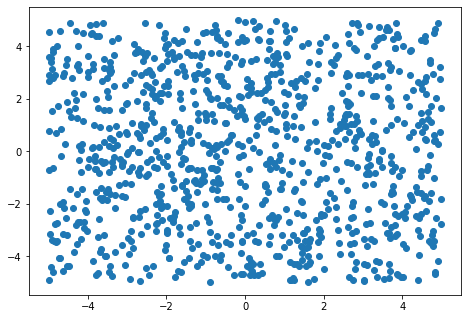

In [58]:
alg = EvolutionaryAlgorithm()

x = []
y = []
for obs in alg.population:
    x.append(obs[0])
    y.append(obs[1])

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.scatter(x, y)

## Uruchomienie algorytmu

In [59]:
alg.Solve()

iteration:  0
mean [-0.0733058   0.03631224]
std [2.81328688 2.7911705 ]
iteration:  1
mean [ 0.08563502 -0.0844037 ]
std [2.5893327  2.61536115]
iteration:  2
mean [ 0.21730052 -0.09217822]
std [2.38479707 2.48414351]
iteration:  3
mean [ 0.26528044 -0.19633341]
std [2.37098103 2.42051712]
iteration:  4
mean [ 0.51233584 -0.26620017]
std [2.14210334 2.22549897]
iteration:  5
mean [ 0.51703081 -0.25669378]
std [2.05759   2.2891172]
iteration:  6
mean [ 0.26811857 -0.41742353]
std [1.89370822 2.23671641]
iteration:  7
mean [ 0.3881617  -0.51833517]
std [1.78309812 2.04786697]
iteration:  8
mean [ 0.33377869 -0.41517172]
std [1.67892995 1.88761088]
iteration:  9
mean [ 0.49789211 -0.30441249]
std [1.63094113 1.79072976]


## Wykresy

### Wizualizacja populacji po uruchomieniu algorytmu

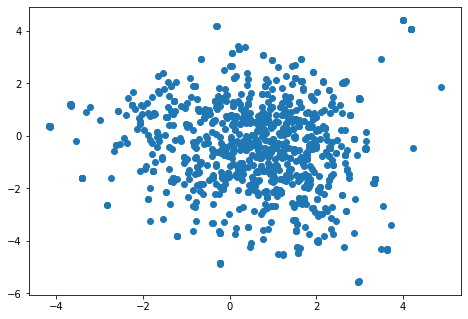

In [60]:
x2 = []
y2 = []
for obs in alg.population:
    x2.append(obs[0])
    y2.append(obs[1])

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.scatter(x2, y2)